In [2]:
from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm import tqdm
import matplotlib.patches as patches
plt.style.use('ggplot')
%matplotlib inline 

In [2]:
# загрузка датафрейма  
df = pd.read_csv("Online Retail.csv")

In [3]:
# добавление столбца с суммарной стоимостью каждой позиции в заказе ("TotalCost")
df['TotalCost'] = df[df['ActionStatus'].isin(['O','C','L'])].apply(lambda row: row['Quantity']*row['UnitPrice'], axis=1)

# добавление столбца с месяцем заказа ("Month")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.strftime('%Y-%m')

# добавление столбца с днем заказа ("Day")
df['Day'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')

### Разведывательный анализ данных

#### Исследование товаров 

In [4]:
# объем продаж каждого товара 
number_of_unit = df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'Quantity':'sum'})['Quantity']
number_of_unit.describe() 
count_leader = number_of_unit.sort_values(ascending=False).index[0]

# выручка по каждому товару 
number_of_money = df[(df['ActionStatus']=='O') & (df['TotalCost']!=0)].groupby(['StockCode']).agg({'TotalCost':'sum'})['TotalCost'] # тут было вот такое условие  & (df['TotalCost']!=0)
number_of_money.describe()
money_leader = number_of_money.sort_values(ascending=False).index[0]

# количество пользователей, купивших каждый товар 
number_of_purchases = df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'CustomerID':'unique'})['CustomerID'].apply(len)
number_of_purchases.describe()
purchase_leader = number_of_purchases.sort_values(ascending=False).index[0]

df[df['StockCode']==count_leader]['Description'].iloc[0]
df[df['StockCode']==money_leader]['Description'].iloc[0]
df[df['StockCode']==purchase_leader]['Description'].iloc[0]

'REGENCY CAKESTAND 3 TIER'

Text(0.5, 0, 'кол-во пользователей купивших товар (log)')

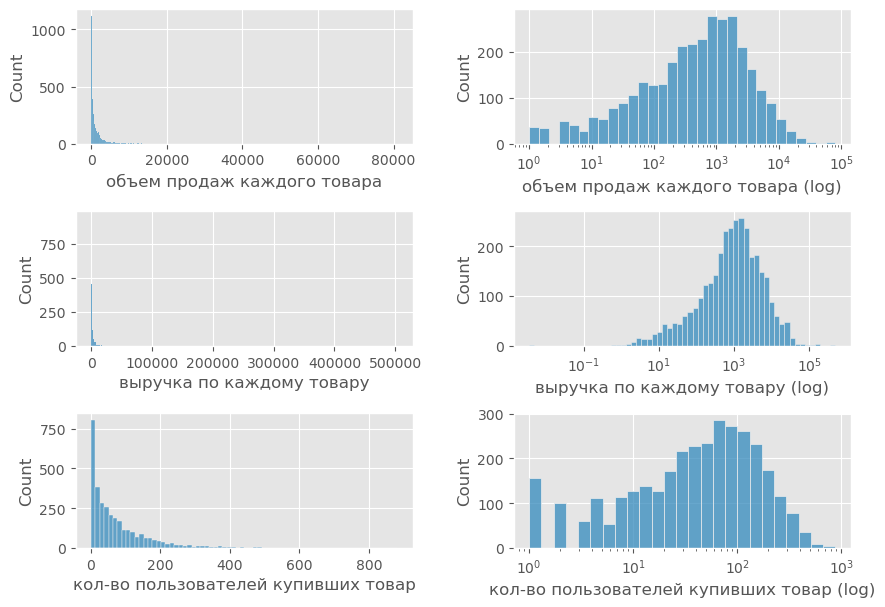

In [12]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(number_of_unit)
ax1.set_xlabel("объем продаж каждого товара")
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(number_of_unit, log_scale=True)
ax2.set_xlabel("объем продаж каждого товара (log)")

ax3 = fig.add_subplot(gs[1, 0])
sns.histplot(number_of_money)
ax3.set_xlabel("выручка по каждому товару")
ax4 = fig.add_subplot(gs[1, 1])
sns.histplot(number_of_money, log_scale=True)
ax4.set_xlabel("выручка по каждому товару (log)")

ax5 = fig.add_subplot(gs[2, 0])
sns.histplot(number_of_purchases)
ax5.set_xlabel("кол-во пользователей купивших товар")
ax6 = fig.add_subplot(gs[2, 1])
sns.histplot(number_of_purchases, log_scale=True)
ax6.set_xlabel("кол-во пользователей купивших товар (log)")

In [6]:
# 10 товаров с наибольшим объемом продаж 
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_unit.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_unit.sort_values(ascending=False).head(10).values, index = new_index)

PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO  BAG BAROQUE BLACK WHITE         79823
MEDIUM CERAMIC TOP STORAGE JAR         78033
SMALL POPCORN HOLDER                   56921
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
WHITE HANGING HEART T-LIGHT HOLDER     41956
ASSORTED COLOUR BIRD ORNAMENT          36461
PACK OF 72 RETROSPOT CAKE CASES        36419
ALLOCATE STOCK FOR DOTCOM ORDERS TA    31722
MINI PAINT SET VINTAGE                 26633
dtype: int64

In [7]:
# ознакомление с товаром, принесшим наибольший объем выручки  

number_of_money.sort_values(ascending=False).iloc[:2].sum() * 100 / number_of_money.sort_values().sum()
## 9% выручки генерируется двумя видами доставки 

# 10 товаров с наибольшим объемом выручки 
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_money.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_money.sort_values(ascending=False).head(10).values, index = new_index)

DOTCOM POSTAGE                         503464.649913
POSTAGE                                495376.410702
REGENCY CAKESTAND 3 TIER               174636.287000
PAPER CRAFT , LITTLE BIRDIE            168469.600000
JUMBO  BAG BAROQUE BLACK WHITE         155541.174359
WHITE HANGING HEART T-LIGHT HOLDER     122263.056000
INCORRECTLY CREDITED C550456 SEE 47    118683.812045
MEDIUM CERAMIC TOP STORAGE JAR          81700.920000
MANUAL                                  81590.111923
ALLOCATE STOCK FOR DOTCOM ORDERS TA     69577.521429
dtype: float64

In [8]:
# 10 товаров, купленных максимальным числом пользователей 
new_index = [df[df['StockCode']==i]['Description'].iloc[0]  for i in number_of_purchases.sort_values(ascending=False).head(10).index]
pd.Series(data = number_of_purchases.sort_values(ascending=False).head(10).values, index = new_index)

REGENCY CAKESTAND 3 TIER               882
WHITE HANGING HEART T-LIGHT HOLDER     857
JUMBO  BAG BAROQUE BLACK WHITE         770
INCORRECTLY CREDITED C550456 SEE 47    761
ASSORTED COLOUR BIRD ORNAMENT          679
SET OF 3 CAKE TINS PANTRY DESIGN       641
PACK OF 72 RETROSPOT CAKE CASES        636
PAPER CHAIN KIT 50'S CHRISTMAS         614
NATURAL SLATE HEART CHALKBOARD         588
BAKING SET 9 PIECE RETROSPOT           582
dtype: int64

Text(0.5, 0, 'кол-во пользователей купивших товар (90 процентиль)')

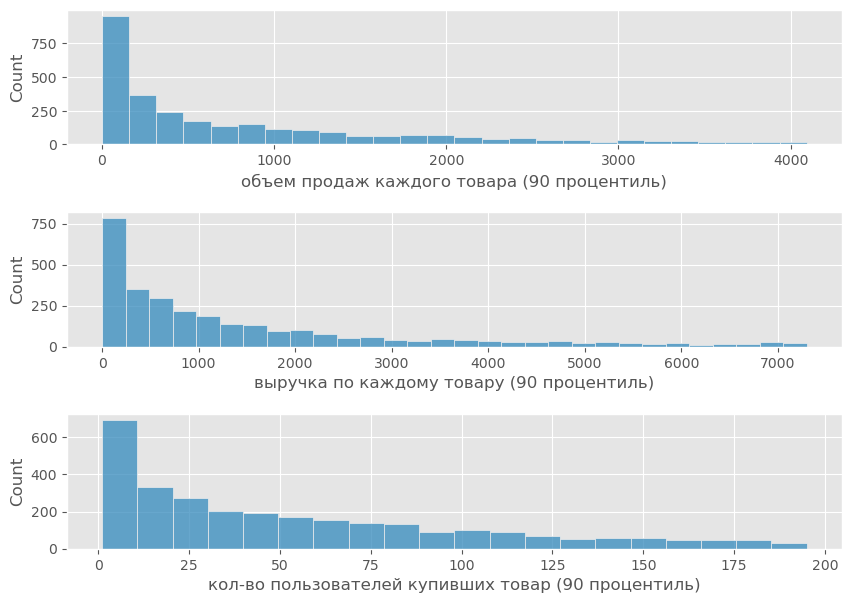

In [13]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 1, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(number_of_unit[number_of_unit<number_of_unit.quantile(0.9)])
ax1.set_xlabel("объем продаж каждого товара (90 процентиль)")

ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(number_of_money[number_of_money<number_of_money.quantile(0.9)])
ax2.set_xlabel("выручка по каждому товару (90 процентиль)")

ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(number_of_purchases[number_of_purchases<number_of_purchases.quantile(0.9)])
ax3.set_xlabel("кол-во пользователей купивших товар (90 процентиль)")

<AxesSubplot:xlabel='Quantity', ylabel='TotalCost'>

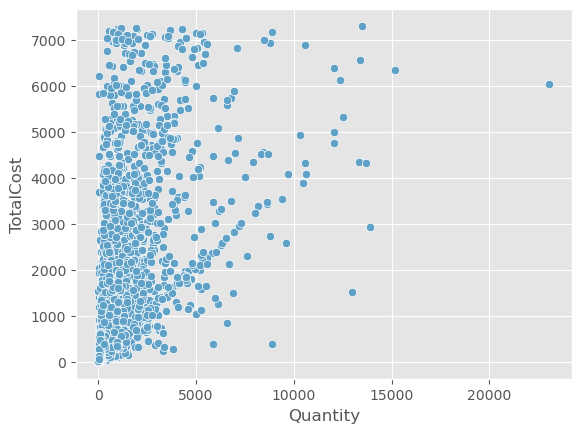

In [14]:
# зависимость объема продаж товара и генерируемой выручки (90 процентиль)
data = pd.merge(number_of_unit, number_of_money, left_index=True, right_index=True)
data = data.reset_index()[data.reset_index()['StockCode'].isin(number_of_money[number_of_money<number_of_money.quantile(0.9)].index)]
sns.scatterplot(data=data, x='Quantity', y='TotalCost', color=(96/255, 161/255, 199/255))

<AxesSubplot:xlabel='UnitPrice', ylabel='TotalCost'>

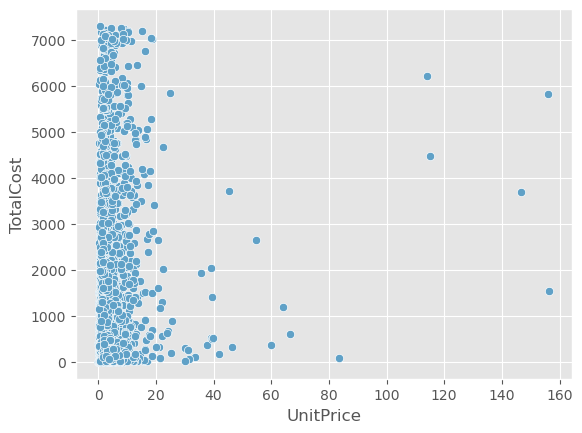

In [15]:
# зависимость стоимость единицы товара и генерируемой выручки (90 процентиль)
data = pd.merge(df[df['ActionStatus']=='O'].groupby(['StockCode']).agg({'UnitPrice':'mean'}), number_of_money, left_index=True, right_index=True)
data = data.reset_index()[data.reset_index()['StockCode'].isin(number_of_money[number_of_money<number_of_money.quantile(0.9)].index)]
sns.scatterplot(data=data, x='UnitPrice', y='TotalCost', color=(96/255, 161/255, 199/255))

#### Итог исследования товаров
- товар с наибольшим объемом продаж: «PAPER CRAFT , LITTLE BIRDIE»
- услуга с максимальной выручкой: «DOTCOM POSTAGE»
- два варианта отправки заказов генерируют 9% выручки 
- товар с максимальной выручкой: «REGENCY CAKESTAND 3 TIER»
- товар купленный максимальным количеством пользователей: «REGENCY CAKESTAND 3 TIER»

#### Исследование заказов 

In [16]:
# выручка от каждого заказа 
count_for_each_order = df[df['ActionStatus']=='O'].groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']
count_for_each_order.sum()
## суммарная выручка 11 518 776 £

count_for_each_order.shape
## количество заказов 20 723

(20723,)

Text(0.5, 0, 'выручка по каждому заказу (90 процентиль)')

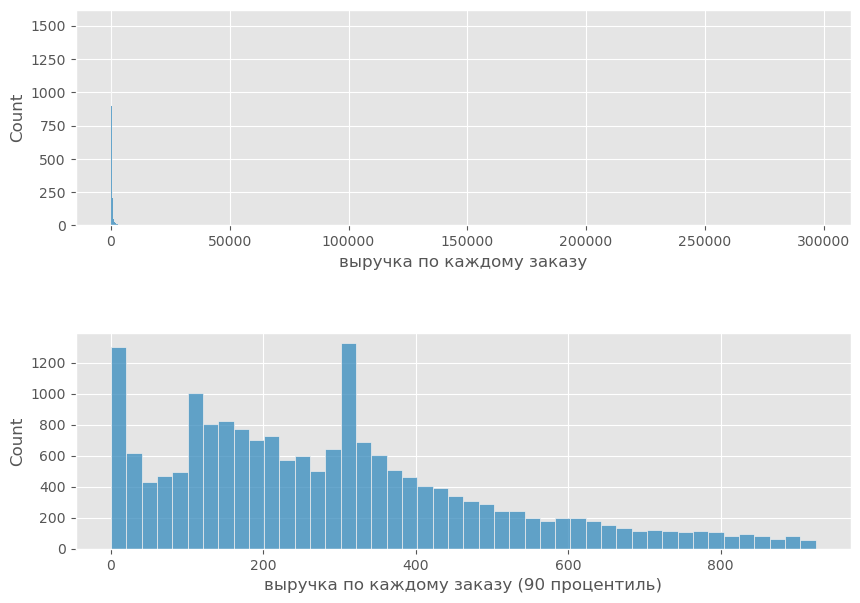

In [17]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
sns.histplot(count_for_each_order)
ax1.set_xlabel("выручка по каждому заказу")
ax2 = fig.add_subplot(gs[1, :])
sns.histplot(count_for_each_order[count_for_each_order<count_for_each_order.quantile(0.9)])
ax2.set_xlabel("выручка по каждому заказу (90 процентиль)")

In [19]:
count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.9)].sum() * 100 / count_for_each_order.sum()
## выручка от 10% самых больших заказов составляет 53% от общей выручки 

count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.99)].sum() * 100 / count_for_each_order.sum()
## выручка от 1% самых больших заказов составляет 24% от общей выручки

# средний чек ("Average Order Value")
count_for_each_order.median()
## средний чек по всему периоду 300.5 £

orders_per_month = df[df['ActionStatus']=='O'].groupby(['Month']).agg({'InvoiceNo':'unique'})['InvoiceNo'].apply(len)
orders_per_month.median()
## среднее количество заказов в каждый месяц 1540

# средний чек по месяцам 
aov_per_month_mean = df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'mean'})['TotalCost']
aov_per_month_median = df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'median'})['TotalCost']

# выручка по месяцам в тысячах фунтов 
revenue_per_month = round(df[df['ActionStatus']=='O'].groupby(['Month', 'InvoiceNo']).agg({'TotalCost':'sum'}).groupby('Month').agg({'TotalCost':'sum'})['TotalCost'], 2)/1000

revenue_per_month.median() * 1000
## средняя выручка в месяц 822 008 £

df[df['Month']=='2011-12']['InvoiceDate'].sort_values()
## небольшое число заказов в 2011-12 обосновано наличием данных всего за 9 дней месяца

516382   2011-12-01 08:12:00
516383   2011-12-01 08:14:00
516384   2011-12-01 08:14:00
516385   2011-12-01 08:14:00
516386   2011-12-01 08:18:00
                 ...        
541894   2011-12-09 12:50:00
541893   2011-12-09 12:50:00
541892   2011-12-09 12:50:00
541898   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
Name: InvoiceDate, Length: 25525, dtype: datetime64[ns]

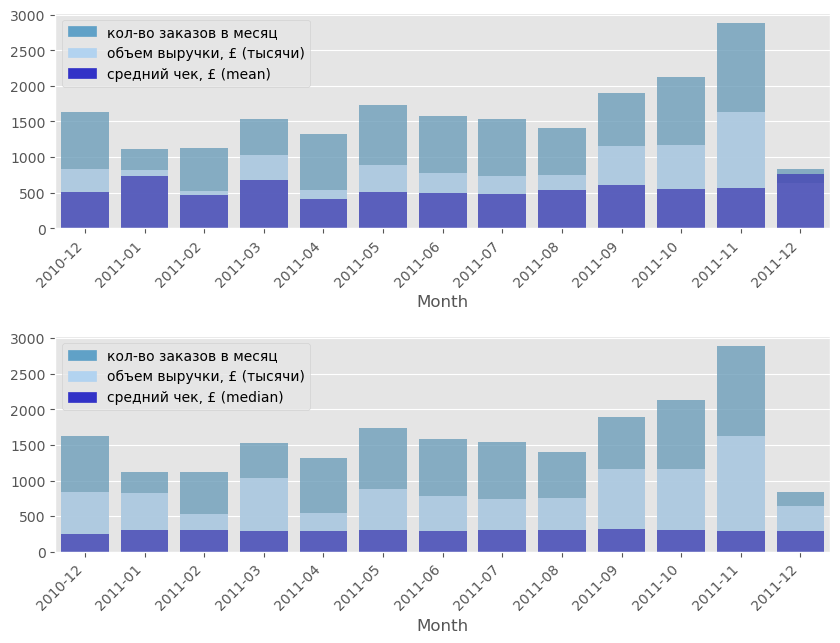

In [20]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='кол-во заказов в месяц')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='средний чек, £ (mean)')
patch_11 = patches.Patch(color=(50/255, 50/255, 199/255), label='средний чек, £ (median)')
patch_2 = patches.Patch(color=(178/255, 211/255, 240/255), label='объем выручки, £ (тысячи)')

ax1 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, color=(178/255, 211/255, 240/255), alpha=0.8)
sns.barplot(x=aov_per_month_mean.index, y=aov_per_month_mean.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax1.set_xticklabels(orders_per_month.index, rotation=45, ha='right')
ax1.legend(handles=[patch, patch_2, patch_1])

ax2 = fig.add_subplot(gs[1, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, color=(178/255, 211/255, 240/255), alpha=0.8)
sns.barplot(x=aov_per_month_median.index, y=aov_per_month_median.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax2.set_xticklabels(orders_per_month.index, rotation=45, ha='right') 
ax2.legend(handles=[patch, patch_2, patch_11])

In [21]:
# исследование 1% самых больших заказов 

big_orders = count_for_each_order[count_for_each_order>count_for_each_order.quantile(0.99)]
df[df['InvoiceNo'].isin(big_orders.index)]['CustomerID'].value_counts(normalize=True)
## 80% самых больших заказов имеют неизвестного пользователя 

df[df['InvoiceNo'].isin(big_orders.index)]['Month'].value_counts(normalize=True).iloc[:3].sum()
## 78% самых больших заказов сделаны за три месяца 2010-12, 2011-11, 2011-12

df[df['InvoiceNo'].isin(big_orders.index)].groupby('InvoiceNo').agg({'Quantity':'sum'})['Quantity'].median()
## среднее количество единиц товаров в самых больших заказах 2 215 (сумма по всем товарам в заказе)

df[df['StockCode'] == df[df['InvoiceNo'].isin(big_orders.index)].groupby(['StockCode']).agg({'CustomerID':'unique'})['CustomerID'].apply(len).sort_values(ascending=False).index[0]]['Description'].iloc[0]
## самый популярный товар в самых больших заказах, купленным наибольшим числом пользователей "REGENCY CAKESTAND 3 TIER"

'REGENCY CAKESTAND 3 TIER'

In [22]:
# "lift"

# уникальные товары 
StockCode_unique = tuple(df[df['ActionStatus']=='O']['StockCode'].unique())

# перечень товаров в каждом заказе
comp_of_orders = tuple([tuple(i) for i in df[df['ActionStatus']=='O'].groupby(['InvoiceNo']).agg({'StockCode':'unique'})['StockCode'].values])

In [ ]:
# расчет долей заказов с каждым товаром 
a = 0
dict_of_unit_values = dict()
for i in StockCode_unique: 
    for j in comp_of_orders: 
        if i in j:
            a+=1 
    dict_of_unit_values[i] = a / 20723 
    a = 0
    
# определение существующих пар товаров
pbar = tqdm(tuple(filter(lambda a: True if len(a)!=1 else False, comp_of_orders)), ncols=80)
a = set()
for i in pbar:
    a.update(set(map(lambda a: tuple(sorted(a)), combinations(i, 2))))

In [ ]:
# расчет lift
pbar = tqdm(a, ncols=80)
b = tuple(filter(lambda a: True if len(a)!=1 else False, comp_of_orders))
z = 0
lift = dict()
for i in pbar:
    for j in b: 
        if i[0] in j:
            if i[1] in j:
                z+=1
    lift[i] = round((z / 20723) / (dict_of_unit_values[i[0]] * dict_of_unit_values[i[1]]), 3)
    z=0  

In [ ]:
for i in pd.Series(lift).sort_values(ascending=False).head(10).index:
    print(df[df['StockCode']==i[0]]['Description'].iloc[0], '-', df[df['StockCode']==i[1]]['Description'].iloc[0])

#### Итог исследования заказов 
- суммарная выручка за период: 11 51 8776 £
- количество выполненных заказов: 20 723
- средний чек за весь период: 300.5 £
- среднее число заказов за месяц: 1540
- средней объем выручки за месяц: 822 000 £
- месяц с наибольшим объемом выручки: 2011-11
- 1% заказов генерирует 24% выручки 
- товары покупки, которых связаны друг с другом сильнее остальных (5 пар):
  - OPULENT VELVET SET/3 CANDLES - KEEP OUT GIRLS DOOR HANGER 
  - SET 10 CARDS TRIANGLE ICONS  17220 - SET 10 CARDS CHRISTMAS BAUBLE 16954
  - WHITE WITH METAL BAG CHARM - GREEN WITH METAL BAG CHARM
  - KEEP OUT GIRLS DOOR HANGER  - WHITE DOVE HONEYCOMB PAPER GARLAND
  - COPPER AND BRASS BAG CHARM - GREEN WITH METAL BAG CHARM

#### Исследование отмененных заказов

In [23]:
# общее число отменных заказов
len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())

3836

In [24]:
# сводник с датой, составом, статусом и пользователем каждого заказа
per_in_inv = df[df['CustomerID']!=0].groupby(['InvoiceNo', 'ActionStatus']).agg({'StockCode':'unique'}).reset_index()
per_in_inv['StockCode'] = per_in_inv['StockCode'].apply(lambda a: sorted(a)) 

per_in_inv = per_in_inv.merge(df.groupby(['InvoiceNo']).agg({'Day':'unique'}).reset_index(), on='InvoiceNo', how='left')
per_in_inv = per_in_inv.merge(df.groupby(['InvoiceNo']).agg({'CustomerID':'unique'}).reset_index(), on='InvoiceNo', how='left')
per_in_inv['Day'] = pd.to_datetime(per_in_inv['Day'].astype('str'), format = "['%Y-%m-%d']")
per_in_inv['CustomerID'] = per_in_inv['CustomerID'].astype('int')
per_in_inv['StockCode'] = per_in_inv['StockCode'].astype('str')

In [25]:
dict_C_O = dict()
for i in per_in_inv[(per_in_inv['ActionStatus']=='C')]['InvoiceNo'].values:
    data = per_in_inv[(per_in_inv['StockCode']== per_in_inv[per_in_inv['InvoiceNo']==i]['StockCode'].iloc[0]) &  \
                      (per_in_inv['Day']== per_in_inv[per_in_inv['InvoiceNo']==i]['Day'].iloc[0]) & \
                      (per_in_inv['CustomerID']== per_in_inv[per_in_inv['InvoiceNo']==i]['CustomerID'].iloc[0]) & \
                      (per_in_inv['ActionStatus']!= per_in_inv[per_in_inv['InvoiceNo']==i]['ActionStatus'].iloc[0])]
    if len(data)!=0: 
        dict_C_O[i] = True
        
len(dict_C_O) * 100 / len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())
## в 4% случаев пользователь, отменивший заказ, в тот же день сделал заказ идентичный отменному
## предположение: возможно это произошло в следствие неочевидности интерфейса

4.040667361835245

In [26]:
dict_C_O_1 = dict()
for i in per_in_inv[(per_in_inv['ActionStatus']=='C')]['InvoiceNo'].values:
    data = per_in_inv[(per_in_inv['Day']== per_in_inv[per_in_inv['InvoiceNo']==i]['Day'].iloc[0]) & \
                      (per_in_inv['CustomerID']== per_in_inv[per_in_inv['InvoiceNo']==i]['CustomerID'].iloc[0]) & \
                      (per_in_inv['ActionStatus']!= per_in_inv[per_in_inv['InvoiceNo']==i]['ActionStatus'].iloc[0])]
    if len(data)!=0: 
        dict_C_O_1[i] = True
        
len(dict_C_O_1) * 100 / len(df[df['ActionStatus']=='C']['InvoiceNo'].unique())
## в 27% случаев пользователь, отменивший заказ, в тот же день сделал другой заказ, не идентичный отменному
## предположение: возможно оформление отменного заказа произошло по ошибке

27.398331595411886

In [27]:
real_C = df[(df['InvoiceNo'].isin(per_in_inv[(per_in_inv['ActionStatus']=='C') & (~per_in_inv['InvoiceNo'].isin(tuple((dict_C_O_1 | dict_C_O).keys())))]['InvoiceNo'].values)) | ((df['ActionStatus']=='C') & (df['CustomerID']==0))]

len(real_C['InvoiceNo'].unique())
## скорректированное, относительно наличия заказов, сделанных по ошибке, количество отменных заказов 2 785

len(df[df['ActionStatus'].isin(('O',))]['InvoiceNo'].unique()) + len(real_C['InvoiceNo'].unique())
# скорректированное, относительно наличия заказов, сделанных по ошибке, общее число заказов 23 508
 
len(real_C['InvoiceNo'].unique()) * 100 / (len(df[df['ActionStatus'].isin(('O',))]['InvoiceNo'].unique()) + len(real_C['InvoiceNo'].unique()))
## 11.8% заказов от общего числа были отменены (с учетом корректировки относительно наличия заказов, сделанных по ошибке)

df[df['ActionStatus'].isin(('O', 'C'))].groupby(['InvoiceNo']).agg({'ActionStatus':'unique'})['ActionStatus'].astype('str').value_counts(normalize=True)
## 15.6% заказов от общего числа были отменены (без учета корректировки относительно наличия заказов, сделанных по ошибке)

real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].median()
## средний чек в отменных заказов равен 16 £

real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'][real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']>real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].quantile(0.9)].sum() * 100 / real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## 10% отменных заказов генерируют 87% суммарная стоимость отменных заказов

real_C['TotalCost'].sum()
## суммарная стоимость отменных заказов 425 922 £

month_C = real_C.groupby(['InvoiceNo']).agg({'Month':'unique'})['Month'].astype('str').apply(lambda a: a[2:-2]).value_counts().sort_index()
month_C.sort_values().mean()
## среднее количество отменных заказов в месяц 214

214.23076923076923

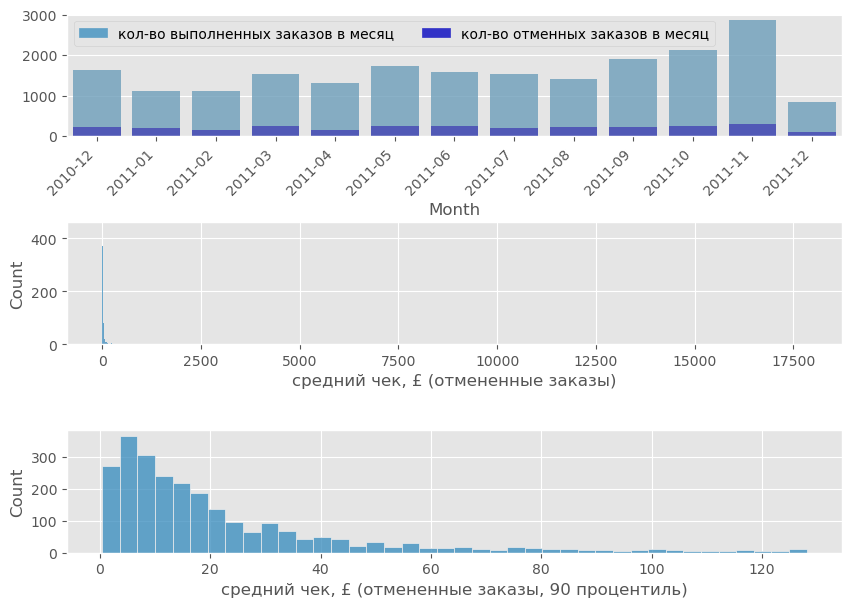

In [28]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.7, wspace=0.3) 

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='кол-во выполненных заказов в месяц')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='кол-во отменных заказов в месяц')

ax1 = fig.add_subplot(gs[1, :])
sns.histplot(real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'])
ax1.set_xlabel("средний чек, £ (отмененные заказы)")

ax2 = fig.add_subplot(gs[2, :])
sns.histplot(real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'][real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost']<real_C.groupby(['InvoiceNo']).agg({'TotalCost':'sum'})['TotalCost'].quantile(0.9)])
ax2.set_xlabel("средний чек, £ (отмененные заказы, 90 процентиль)")

ax3 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=month_C.index, y=month_C.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax3.set_xticklabels(orders_per_month.index, rotation=45, ha='right') 
ax3.legend(handles=[patch, patch_1], ncol=2)

#### Итог исследования отмененных заказов
- в 4% случаев пользователь, отменивший заказ, сделал аналогичный заказ в тот же день. Из этого можно сделать вывод, что заказ был оформлен по ошибке
- в 27% случаев пользователь, отменивший заказ, сделал иной заказ в тот же день. Из этого можно сделать вывод, что заказ был оформлен по ошибке
- скорректированное, относительно наличия заказов, сделанных по ошибке, процентное соотношение отменных заказов к общему числу заказов: 11.8% 
- среднее количество отменных заказов в месяц: 214
- средний чек в отменных заказах: 16 £
- суммарная стоимость отменных заказов: 425 922 £
- 10% отменных заказов генерируют 87% суммарная стоимость отменных заказов

#### Исследование пользователей 

In [29]:
len(df[df['ActionStatus']=='O']['CustomerID'].unique()) - 1
cust_per_month = df[df['ActionStatus']=='O'].groupby(['Month']).agg({'CustomerID':'nunique'})['CustomerID'].sort_index()
## число пользователей 4339. неизвестные пользователи не учитываются 

df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'InvoiceNo':'nunique'})['InvoiceNo'].loc[0] * 100 / df[(df['ActionStatus']=='O')]['InvoiceNo'].nunique()
## 10.5% заказов сделано неизвестными пользователями

num_of_or = df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'InvoiceNo':'nunique'})['InvoiceNo'].iloc[1:]
num_of_or.median()
## среднее число заказов, сделанных пользователями 2

count_of_or = df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].iloc[1:]
count_of_or[count_of_or>count_of_or.quantile(0.9)].sum() * 100 / df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## 10% известных пользователей генерируют 47% выручки

df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].iloc[0] * 100 / df[df['ActionStatus']=='O'].groupby(['CustomerID']).agg({'TotalCost':'sum'})['TotalCost'].sum()
## неизвестные пользователи генерируют 22.5% выручки

count_of_or.median()
## средний доход с одного пользователя (ARPU) 674.68 £

674.68

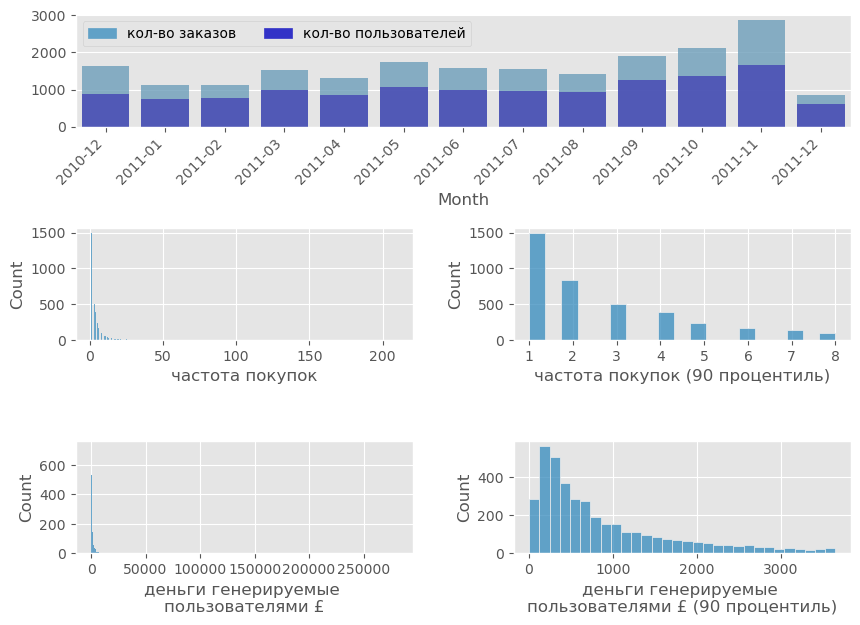

In [30]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(3, 2, hspace=0.9, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='кол-во заказов')
patch_1 = patches.Patch(color=(50/255, 50/255, 199/255), label='кол-во пользователей')

ax1 = fig.add_subplot(gs[1, 0])
sns.histplot(num_of_or)
ax1.set_xlabel("частота покупок")

ax2 = fig.add_subplot(gs[1, 1])
sns.histplot(num_of_or[num_of_or<num_of_or.quantile(0.9)])
ax2.set_xlabel("частота покупок (90 процентиль)")

ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(count_of_or)
ax3.set_xlabel("деньги генерируемые \nпользователями £")

ax4 = fig.add_subplot(gs[2, 1])
sns.histplot(count_of_or[count_of_or<count_of_or.quantile(0.9)])
ax4.set_xlabel("деньги генерируемые \nпользователями £ (90 процентиль)")

ax5 = fig.add_subplot(gs[0, :])
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color=(96/255, 161/255, 199/255), alpha=0.8)
sns.barplot(x=cust_per_month.index, y=cust_per_month.values, color=(50/255, 50/255, 199/255), alpha=0.8)
ax5.set_xticklabels(cust_per_month.index, rotation=45, ha='right') 
ax5.legend(handles=[patch, patch_1], loc='upper left', ncol=2)

In [31]:
# исследование пользователей, отменявших заказы 

dict_real_C = dict()
for i in real_C['CustomerID'].unique():
    data = df[(df['ActionStatus'].isin(('O', 'C'))) & (df['CustomerID']==i)].loc[::, ['InvoiceNo', 'Country', 'ActionStatus', 'Day']]
    data = data[~data.duplicated()].merge(df[(df['ActionStatus'].isin(('O', 'C'))) & (df['CustomerID']==i)].groupby(['InvoiceNo']).agg({'TotalCost':'sum'}).reset_index(), on='InvoiceNo', how='left')
    if (len(data['ActionStatus'].unique()) == 1) and (len(data['Day'].unique()) == 1):
        dict_real_C[i]='used once. cancel'
        ## единственная попытка пользователя взаимодействия с сервисом 
        
    elif list(data.groupby(['Day']).agg({'ActionStatus':'unique'})['ActionStatus'].iloc[-1]) != ['C']:
        dict_real_C[i]= 'used after cancel'
        ## после отмены заказа пользователь пользовался сервисом (делал мин. 1 заказ
        
    elif (len(data['ActionStatus'].unique()) != 1) & (list(data.groupby(['Day']).agg({'ActionStatus':'unique'})['ActionStatus'].iloc[-1]) == ['C']):
        dict_real_C[i]= 'used before. not used after cancel'
        ## пользователь делал заказы до отмены и не делал после отмены заказа
        
    elif (len(data['ActionStatus'].unique()) == 1) and (len(data['Day'].unique()) != 1):
        dict_real_C[i]= 'used several times. cancel'
        ## пользователь несколько дней подряд отменял заказы. ранее заказы не делал 

len(df[df['ActionStatus']=='O']['CustomerID'].unique()) - 1 + pd.Series(dict_real_C).value_counts().iloc[2] + pd.Series(dict_real_C).value_counts().iloc[3]
## количество уникальных пользователей 4 372. пользователи, делавшие заказы и отмены (в том числе пользователи делавшие только отмены заказов)
        
pd.Series(dict_real_C).value_counts(normalize=True)

used after cancel                     0.634202
used before. not used after cancel    0.340491
used once. cancel                     0.023773
used several times. cancel            0.001534
dtype: float64

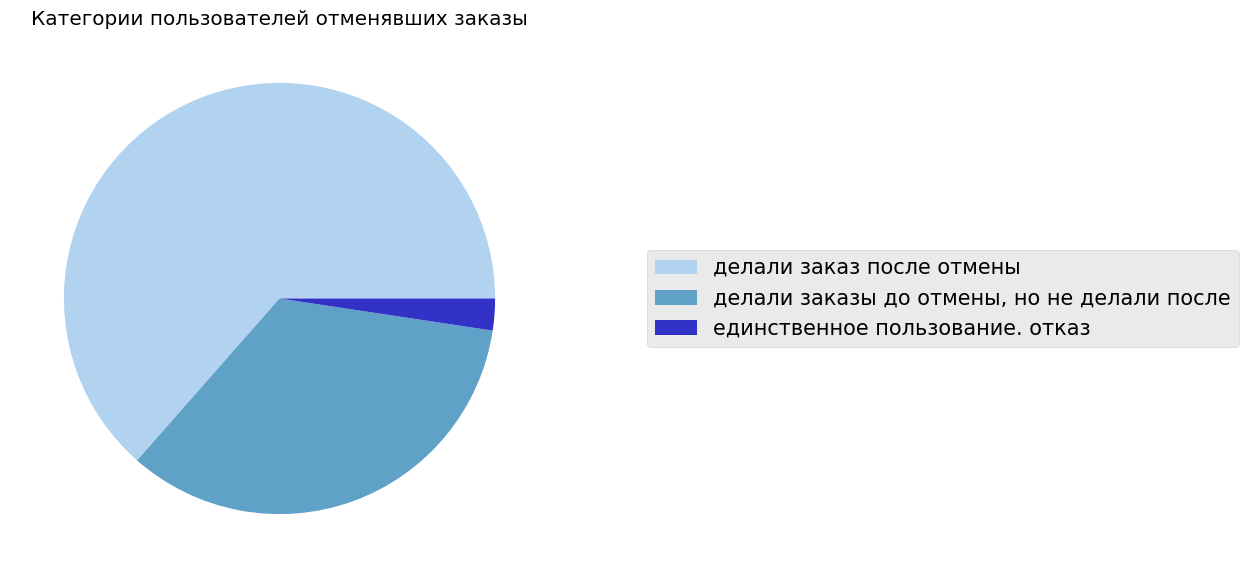

In [32]:
# графики 
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

ax1 = fig.add_subplot(gs[0:, :])
plt.title('Категории пользователей отменявших заказы', pad=0.5)
colors = [(178/255, 211/255, 240/255), (96/255, 161/255, 199/255), (50/255, 50/255, 199/255)]
plt.pie(pd.Series(dict_real_C).value_counts().iloc[:-1], radius=1.0, colors=colors, center = (0, 5))
plt.legend(loc='center right', bbox_to_anchor=(2.3, 0.5), labels = ['делали заказ после отмены', 'делали заказы до отмены, но не делали после', 'единственное пользование. отказ'], fontsize = 15)

In [33]:
# рейтинг пользователей на основе среднего, ежемесячно генерируемого ими, процента от прибыли

uniq_cust = np.append(df[(df['ActionStatus']=='O') & (df['CustomerID']!=0)]['CustomerID'].unique(), pd.Series(dict_real_C)[pd.Series(dict_real_C).isin(('used once. cancel', 'used several times. cancel'))].index, axis=0) 
pbar = tqdm(uniq_cust, ncols=80)
dict_cust = dict()
b = df[(df['ActionStatus']=='O')].groupby(['Month']).agg({'TotalCost':'sum'})['TotalCost']
z = df[(df['ActionStatus']=='O')].groupby(['Month', 'CustomerID']).agg({'TotalCost':'sum'})['TotalCost']
for i in pbar:
    a = dict()
    for j in list(df['Month'].unique()):
        try:
            a[j] = z.loc[j, i] * 100 / b.loc[j]
        except:
            a[j] = 0
            continue        
    dict_cust[i] = pd.Series(a).mean()

pd.Series(dict_cust).sort_values(ascending=False) 

100%|███████████████████████████████████████| 4372/4372 [02:00<00:00, 36.22it/s]


14646.0    2.478615
18102.0    2.184605
16446.0    2.023228
17450.0    1.482812
14911.0    1.187674
             ...   
14213.0    0.000000
16995.0    0.000000
13958.0    0.000000
17547.0    0.000000
15728.0    0.000000
Length: 4372, dtype: float64

#### Итог исследования пользователей
- число пользователей: 4372
- 10.5% заказов сделано неизвестными пользователями 
- неизвестные пользователи генерируют 22.5% выручки
- 10% известных пользователей генерируют 47% выручки
- среднее число заказов, сделанных пользователями: 2
- средний доход с одного пользователя (ARPU): 674.68 £
- 63% пользователей, отменявших заказ, продолжили пользоваться сервисом
- 34% пользователей, после отмены заказа более не пользовались сервисом 
- для 2% пользователей, отменный заказ был единственным 
- на основе имеющихся данных создан рейтинг пользователей 

#### Исследование списаний

In [34]:
df[df['ActionStatus']=='L']['TotalCost'].sum()
## общая сумма списаний 452 004 £

df[df['ActionStatus']=='L']['StockCode'].value_counts()
df[(df['ActionStatus']=='L') & (df['StockCode']==72802)]['Description'].iloc[0]
## товар списывавшейся чаще других

df[df['ActionStatus']=='L'].groupby(['StockCode']).agg({'Quantity':'sum'})['Quantity'].sort_values(ascending=False)
df[(df['ActionStatus']=='L') & (df['StockCode']==23005)]['Description'].iloc[0]
## товар списанный в самом большом объеме

month_L = df[df['ActionStatus']=='L'].groupby(['Month']).agg({'UnitPrice':'sum'})['UnitPrice']
month_L.median()
## средний объем ежемесячного списания 354 £

354.9330357142857

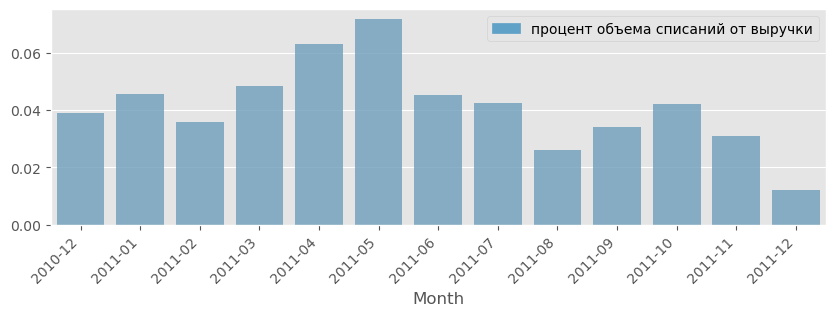

In [35]:
# графики
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.3)

patch = patches.Patch(color=(96/255, 161/255, 199/255), label='процент объема списаний от выручки')

data = pd.concat(((revenue_per_month * 1000), month_L), axis=1).apply(lambda row: row['UnitPrice'] * 100 / row['TotalCost'], axis=1)

ax1 = fig.add_subplot(gs[1, :])
sns.barplot(x=data.index, y=data.values, color=(96/255, 161/255, 199/255), alpha=0.8)
ax1.set_xticklabels(cust_per_month.index, rotation=45, ha='right') 
ax1.legend(handles=[patch], loc='upper right')

#### Итог исследования списаний 
- общая сумма списаний: 452 004 £
- товар списывавшейся чаще других: "ROSE SCENT CANDLE IN JEWELLED BOX"
- товар списанный в самом большом объеме: "TRAVEL CARD WALLET I LOVE LONDON"
- средний объем ежемесячного списания 354 £